# **PFG1 - MATEUS LEITE PEDROSA**

***DESCRIÇÃO:*** Notebook Google Colab para implementação dos testes dos modelos da CNN - PFG1


***INFORMAÇÕES***
*   ***PRIMEIRA FASE DE TESTES***
*   ***ARQUITETURA -> CNN(3) + DNN(128,128,7)***
*   ***OPTIMIZATION ALGORITHM -> RMSPROP***
*   ***LEARNING RATES -> (0.00001)***

# Importando bibliotecas

In [2]:
# Bibliotecas padrão
import matplotlib.pyplot as plt
import pandas as pd
import glob as gb
import os

# Bibliotecas Deep Learning
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, BatchNormalization

# Integração com dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
BATCH_SIZE = 64
TRAIN_DIR = '/content/drive/MyDrive/PFG1/ConsolidadoPaperVersion_Dataset/train'
TEST_DIR = '/content/drive/MyDrive/PFG1/ConsolidadoPaperVersion_Dataset/test'

In [5]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 356 in folder surprise
For training data, found 356 in folder anger
For training data, found 356 in folder sad
For training data, found 356 in folder happy
For training data, found 356 in folder disgust
For training data, found 356 in folder neutral
For training data, found 356 in folder fear


In [6]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 89 in folder happy
For testing data, found 89 in folder fear
For testing data, found 89 in folder anger
For testing data, found 89 in folder sad
For testing data, found 89 in folder neutral
For testing data, found 89 in folder disgust
For testing data, found 89 in folder surprise


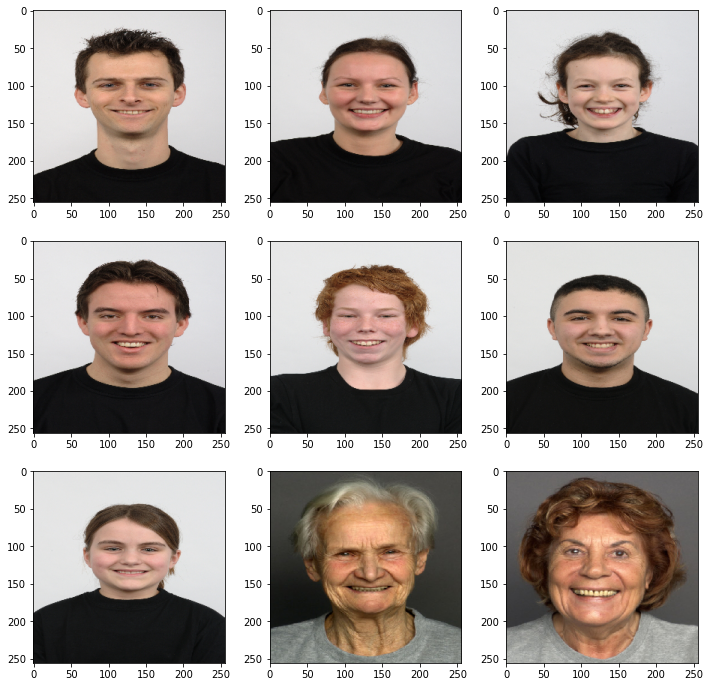

In [7]:
# Verifica imagens
from keras.preprocessing.image import load_img, img_to_array

expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(TRAIN_DIR + "/" + expression + "/" +
                  os.listdir(TRAIN_DIR + "/" + expression)[i], target_size=(256,256))
    plt.imshow(img)   
plt.show()

# Criação e tratamento dos datasets -> "train" e "test"

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = BATCH_SIZE,
                                                 color_mode = "rgb",
                                                 shuffle=True,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (64, 64),
                                            batch_size = BATCH_SIZE,
                                            color_mode = "rgb",
                                            shuffle=True,
                                            class_mode = 'categorical')

Found 2492 images belonging to 7 classes.
Found 623 images belonging to 7 classes.


# Implementação do modelo da CNN

In [9]:
model = Sequential()

# CNN LAYER 1
model.add(Conv2D(input_shape=(64,64,3),filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
# CNN LAYER 2
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
# CNN LAYER 3
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

# DNN LAYER 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# DNN LAYER 2
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# DNN LAYER 3
model.add(Dense(7, activation='softmax'))

# OPT AND LR
model.compile(optimizer=RMSprop(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

# Treinamento do modelo da CNN

In [10]:
# Treinamento do modelo
history = model.fit(training_set,batch_size=BATCH_SIZE,epochs=500,verbose=1,validation_data=test_set,shuffle=True)

Epoch 1/500
39/39 [==============================] - 2178s 56s/step - loss: 2.0833 - accuracy: 0.1417 - val_loss: 1.9444 - val_accuracy: 0.1493
Epoch 2/500
39/39 [==============================] - 11s 273ms/step - loss: 2.0235 - accuracy: 0.1569 - val_loss: 1.9443 - val_accuracy: 0.1605
Epoch 3/500
39/39 [==============================] - 11s 277ms/step - loss: 2.0016 - accuracy: 0.1445 - val_loss: 1.9443 - val_accuracy: 0.1637
Epoch 4/500
39/39 [==============================] - 11s 287ms/step - loss: 1.9930 - accuracy: 0.1453 - val_loss: 1.9445 - val_accuracy: 0.1509
Epoch 5/500
39/39 [==============================] - 11s 270ms/step - loss: 1.9746 - accuracy: 0.1441 - val_loss: 1.9446 - val_accuracy: 0.1461
Epoch 6/500
39/39 [==============================] - 11s 282ms/step - loss: 1.9726 - accuracy: 0.1376 - val_loss: 1.9446 - val_accuracy: 0.1380
Epoch 7/500
39/39 [==============================] - 11s 285ms/step - loss: 1.9612 - accuracy: 0.1517 - val_loss: 1.9446 - val_accuracy:

In [11]:
# Avaliando métricas do modelo com o dataset "test"
model.evaluate(test_set)

10/10 [==============================] - 2s 201ms/step - loss: 1.6661 - accuracy: 0.3515


[1.6661455631256104, 0.35152488946914673]

# Etapa de data visualization

In [12]:
# Checking the train and test loss and accuracy values from the neural network above

model.save('model1.h5')

view_train_loss = history.history['loss']
view_test_loss = history.history['val_loss']

view_train_accuracy = history.history['accuracy']
view_test_accuracy = history.history['val_accuracy']

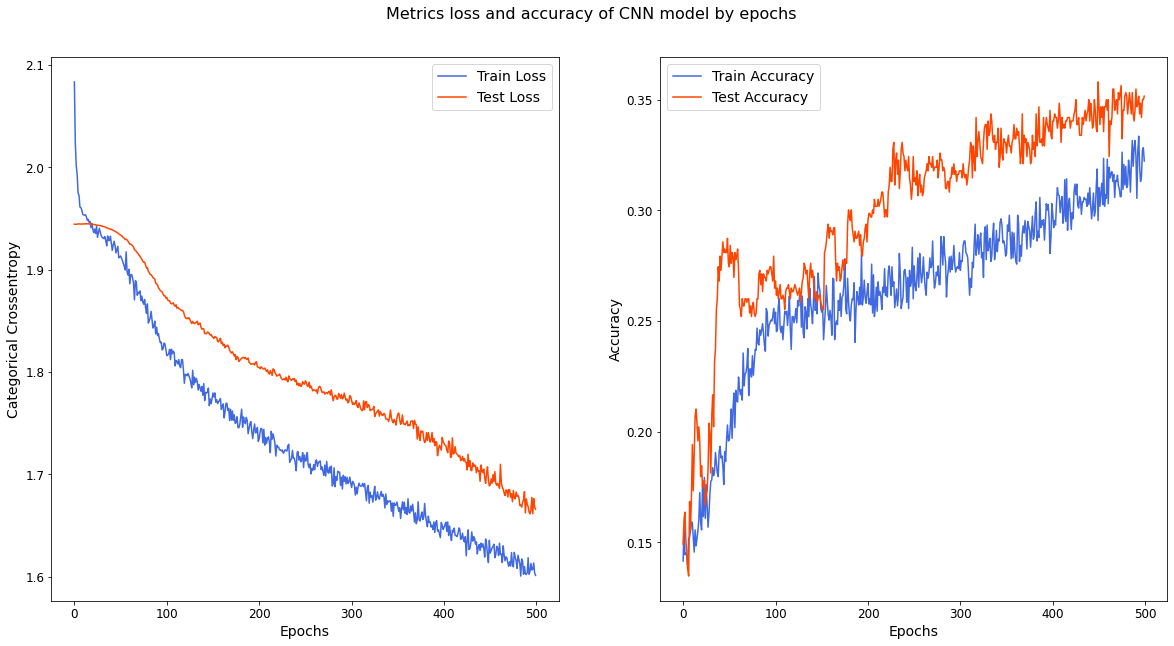

In [13]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(20,10))

ax = ax.ravel()

# Loss
ax[0].plot(view_train_loss, label='Train Loss', color='royalblue')
ax[0].plot(view_test_loss, label='Test Loss', color = 'orangered')

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

# Accuracy
ax[1].plot(view_train_accuracy, label='Train Accuracy', color='royalblue')
ax[1].plot(view_test_accuracy, label='Test Accuracy', color='orangered')

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

# Legenda
fig.suptitle(x=0.5, y=0.95, t="Metrics loss and accuracy of CNN model by epochs", fontsize=16)

# Saving the figure
plt.savefig('output_metrics.png')

In [14]:
from google.colab import files
files.download('output_metrics.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**TESTE**